# Question1

In [29]:
# Step 1. Import the necessary libraries

import pandas as pd
import numpy as np

In [30]:
# Step 2. Import the dataset from this address - https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user
# Step 3. Assign it to a variable called users

users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')
users           # displaying entire dataset

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [31]:
# Step 4. Discover what is the mean age per occupation

# Herein, grouping the users variable by column occupation, followed by calculating mean age for each occupation
# Below is the expression used:

users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [33]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least

# Firstly using pivot_table to segerate the data indexed by occupation and gender
# Herein, sorting the data in ascending order too, as per Male count and storing the result in Ratio

Ratio = (users.pivot_table(index='occupation', columns='gender', aggfunc='size',fill_value=0)).sort_values(by='M',ascending=False)

In [34]:
# Below is the output of Ratio, wherein 'F' and 'M' counts can be seen for each occupation
# Next, creating a new column maleRatio further using these counts for aggregating
Ratio

gender,F,M
occupation,,
student,60,136
other,36,69
educator,26,69
engineer,2,65
programmer,6,60
administrator,36,43
executive,3,29
scientist,3,28
technician,1,26


In [35]:
# Now, need to aggregate male ratio and so, creating a new column 'maleRatio' in addition to occupation and gender

Sum_Row_Ratio = Ratio[['F','M']].sum(axis=1)                      # Performing sum along the rows for 'F' and 'M'
Ratio['maleRatio'] = round( Ratio['M'] * 100 / Sum_Row_Ratio, 1 ) # Aggregating new column maleRatio using Sum_Row_Ratio

# sorting the table in ascending order as per new column maleRatio
Ratio.sort_values(by='maleRatio', ascending=False)

gender,F,M,maleRatio
occupation,,,
doctor,0,7,100.0
engineer,2,65,97.0
technician,1,26,96.3
retired,1,13,92.9
programmer,6,60,90.9
executive,3,29,90.6
scientist,3,28,90.3
entertainment,2,16,88.9
lawyer,2,10,83.3


In [36]:
# Step 6. For each occupation, calculate the minimum and maximum ages

# Herein, grouping the users variable by column occupation, followed by calculating minimum and maximum ages for each occupation
# Below is the expression used:

users.groupby('occupation').age.agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [37]:
# Step 7. For each combination of occupation and sex, calculate the mean age

# Herein, grouping the users variable by columns occupation and gender, followed by calculating mean age for each combination
# Below is the expression used:

users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [38]:
# Step 8. For each occupation present the percentage of women and men

# Firstly using pivot_table to segerate the data indexed by occupation and gender
# Herein, sorting the data in ascending order too, as per Male count and storing the result in Percentage

Percentage = (users.pivot_table(index='occupation', columns='gender', aggfunc='size',fill_value=0)).sort_values(by='M',ascending=False)

In [39]:
# Below is the output of Percentage, wherein 'F' and 'M' counts can be seen for each occupation
# Next, creating two new columns 'malePercentage' and 'womenPercenatge' further using these counts for aggregating

Percentage

gender,F,M
occupation,,
student,60,136
other,36,69
educator,26,69
engineer,2,65
programmer,6,60
administrator,36,43
executive,3,29
scientist,3,28
technician,1,26


In [40]:
# Now, need to aggregate percentage and so, creating 2 new columns in addition to occupation and gender

Sum_Percentage = Percentage[['F','M']].sum(axis=1)                                  # Performing sum along the rows for 'F' and 'M'
Percentage['malePercentage'] = round( Percentage['M'] * 100 / Sum_Percentage, 1 )   # Aggregating new column malePercentage using Sum_Percentage
Percentage['womenPercenatge'] = round( Percentage['F'] * 100 / Sum_Percentage, 1 )  # Aggregating new column womenPercenatge using Sum_Percentage

# sorting the table in ascending order as per new column 'malePercentage'
Percentage.sort_values(by='malePercentage', ascending=False)

gender,F,M,malePercentage,womenPercenatge
occupation,,,,
doctor,0,7,100.0,0.0
engineer,2,65,97.0,3.0
technician,1,26,96.3,3.7
retired,1,13,92.9,7.1
programmer,6,60,90.9,9.1
executive,3,29,90.6,9.4
scientist,3,28,90.3,9.7
entertainment,2,16,88.9,11.1
lawyer,2,10,83.3,16.7


# Question 2

In [41]:
# Step 1. Import the necessary libraries

import pandas as pd
import numpy as np

In [46]:
# Step 2. Import the dataset from this address - https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv
# Step 3. Assign it to a variable called euro12

euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12               # displaying entire dataset

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [47]:
# Step 4. Select only the Goal column

euro12['Goals']    # displaying only 'Goal' column from euro12 variable

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [48]:
# Step 5. How many team participated in the Euro2012?

len(euro12['Team'].unique())   # length of unique 'Team' column will display the number of Teams in euro12 variable which is 16

16

In [54]:
# Step 6. What is the number of columns in the dataset?
# There are number of ways to get the number of columns in a dataset. I will be showing 2 ways to display the number of columns in this dataset

# Method 1: Using below expression to get the number of columns in the euro12 dataset
len(euro12.columns)

35

In [55]:
# Method 2: Alternatively, we can also use head() function to display 5 rows and total associated columns
# Nummber of rows and TOTAL columns is displayed at the end. For instance, in this case it's displayed as (5 * 35)
# Cleary, it is shown that there are 35 columns in the dataset, which exactly matches with the value returned using len() in Method 1
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [59]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

# Herein, creating the dataframe discipline having columns Team, Yellow Cards and Red Cards
# Below is the expression used:

discipline = pd.DataFrame(euro12, columns=['Team','Yellow Cards', 'Red Cards'])

In [60]:
# displaying the dataframe 'discipline' having 3 columns namely - Team, Yellow Cards and Red Cards

discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [61]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards

# herein, sorting the dataframe discipline using sort_values() function in ascending order 
# first by column Red Cards and then followed by Yellow Cards

discipline.sort_values( ['Red Cards','Yellow Cards'], ascending = [True, True] )

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [70]:
# Step 9. Calculate the mean Yellow Cards given per Team
# Herein, grouping the dataframe discipline by column Team, followed by calculating mean Yellow cards for each Team
# Below is the expression used:

discipline.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9
Czech Republic          7
Denmark                 4
England                 5
France                  6
Germany                 4
Greece                  9
Italy                  16
Netherlands             5
Poland                  7
Portugal               12
Republic of Ireland     6
Russia                  6
Spain                  11
Sweden                  7
Ukraine                 5
Name: Yellow Cards, dtype: int64

In [82]:
# Step 10. Filter teams that scored more than 6 goal

# Below expression displays the columns 'Team' and 'Goals' where Goals more than 6 

euro12[['Team', 'Goals']][euro12.Goals > 6]

,Team,Goals
5,Germany,10
13,Spain,12


In [83]:
# Step 11. Select the teams that start with G

# Below expression displays the column 'Team' that start with 'G'

euro12[['Team']][euro12.Team.str[0] == 'G']

,Team
5,Germany
6,Greece


In [85]:
# Step 12. Select the first 7 columns

# Below expression displays the first 7 columns out of total 35 columns from euro12

euro12.iloc[: ,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [86]:
# Step 13. Select all columns except the last 3

# Below expression displays all the columns except the last 3 i.e. it will display first 32 columns and exclude last 3 columns

euro12.iloc[: , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [91]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia

# Below expression displays the columns 'Team' and 'Shooting Accuracy' from euro12 where Team is either England, Italy or Russia

euro12[['Team', 'Shooting Accuracy']][(euro12.Team == 'England') | (euro12.Team == 'Italy') | (euro12.Team == 'Russia')]


,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [92]:
# Step 1. Import the necessary libraries

import pandas as pd
import numpy as np

In [93]:
# Step 2. Create 3 differents Series, each of length 100, as follows:
# • The first a random number from 1 to 4
# • The second a random number from 1 to 3
# • The third a random number from 10,000 to 30,000

# using below expression to create 3 random series namely randomSeries1, randomSeries2 and randomSeries3
# randomSeriesX = pd.Series(np.random.randint(lowest integer, highest integer, size=number of random integers))
# Herein, lowest integer is (inclusive), highest integer is (exclusive)

randomSeries1 = pd.Series(np.random.randint(1, 5, size=100))
randomSeries2 = pd.Series(np.random.randint(1, 4, size=100))
randomSeries3 = pd.Series(np.random.randint(10000, 30001, size=100))

In [97]:
# Step 3. Create a DataFrame by joinning the Series by column

# Using pd.concat() to create a DataFrame 'Housing' for joining the 3 series of random numbers generated above

Housing = pd.concat([randomSeries1, randomSeries2, randomSeries3], axis=1)
Housing     # displaying the dataframe Housing (generated by joining 3 series)

,0,1,2
0,1,2,12365
1,4,1,15041
2,3,3,29550
3,1,3,22292
4,3,1,20015
...,...,...,...
95,3,3,27877
96,1,1,14992
97,3,2,25367
98,4,1,27895


In [100]:
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

# Below expression renames the 3 columns from old column names '0', '1' and '2' to 'bedrs', 'bathrs' and 'price_sqr_meter' respectively

Housing.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
Housing    # displaying the dataframe Housing with changed column names

,bedrs,bathrs,price_sqr_meter
0,1,2,12365
1,4,1,15041
2,3,3,29550
3,1,3,22292
4,3,1,20015
...,...,...,...
95,3,3,27877
96,1,1,14992
97,3,2,25367
98,4,1,27895


In [118]:
# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

# Using pd.concat() to create a DataFrame 'bigcolumn' having one column only by joining the 3 series of random numbers generated

bigcolumn = pd.DataFrame(pd.concat([randomSeries1, randomSeries2, randomSeries3], axis=0))
bigcolumn       # displaying the dataframe bigcolumn having 1 column

,0
0,1
1,4
2,3
3,1
4,3
...,...
95,27877
96,14992
97,25367
98,27895


In [119]:
# Step 6. Ops it seems it is going only until index 99. Is it true?

# Yes, as displayed above it is indexed until index 99, though it shows (300 rows * 1 columns) at the end.
# This is because we have defined the length of each series as 100 while creating the series, so it's going until 99 itself.
# Now, need to re-index the DataFrame 'bigcolumn' so that it is indexed from 0 to 299 as per required expectation.

In [120]:
# Step 7. Reindex the DataFrame 'bigcolumn' so it goes from 0 to 299

# Below expression resets the index correctly of the same column '0' from 0 to 299 (without adding new column having used drop = True)
bigcolumn.reset_index(inplace = True, drop = True)

In [121]:
# displaying dataframe 'bigcolumn' after re-setting the index. It is evident that now the index has been reset from 0 to 299.
bigcolumn

,0
0,1
1,4
2,3
3,1
4,3
...,...
295,27877
296,14992
297,25367
298,27895


# Question 4

In [96]:
# Step 1. Import the necessary libraries

import pandas as pd
import numpy as np
import datetime

In [97]:
# Step 2. Import the dataset from the attached file wind.txt
data=pd.read_csv("C:/Users/abhis/Downloads/Backup-20211009T021753Z/Backup/Georgian/Classes/BDAT 1004_Data Programming/Problem Set3/wind.txt", sep="\s+")

data     # displaying contents in data


,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [98]:
# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

# Herein, first three columns are separate with year, month and date columns individually.
# Need to combine these three columns usiing parse_dates with respective column names.
# Therafter, reading data again, and displaying the same

data=pd.read_csv("C:/Users/abhis/Downloads/Backup-20211009T021753Z/Backup/Georgian/Classes/BDAT 1004_Data Programming/Problem Set3/wind.txt", sep="\s+", parse_dates=[[0,1,2]])

data      # displaying contents in data with correct date format

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [99]:
# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

# Creating a function date_func() to fix the incorrect years which are greater than 2021 in the 'data' dataset if any
def date_func(d):
    yyyy=d.year                # declaring a local variable yyyy to store the year value as per below condition
    if d.year > 2021:          
        yyyy = d.year - 100    # updating year of the column 'Yr_Mo_Dy' to (d.year - 100) for updating the year if year > 2021
    else: 
        d.year                 # else keeping the year value as same if year < 2021
    return datetime.date(yyyy,d.month,d.day)   # returning the date as(year, month, date)

# Using apply() method with above created function date_func() as input to apply the changes to the entire 'data' dataset
data['Yr_Mo_Dy']=data['Yr_Mo_Dy'].apply(date_func)

data     # displaying contents in data with updated dates 

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [103]:
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

# convert the 'Yr_Mo_Dy' date column to datetime format using pd.to_datetime
data['Yr_Mo_Dy'] = pd.to_datetime(data['Yr_Mo_Dy'])

# setting the 'Yr_Mo_Dy' date column as index
data=data.set_index('Yr_Mo_Dy')

data      # displaying contents in data with updated datetime format and index 


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [104]:
# Step 6. Compute how many values are missing for each location over the entire record. They should be ignored in all calculations below.

data.isnull().sum()   # displaying sum of null values in 'data'

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [270]:
# Creating a new dataframe 'data_new' by removing all the null values in each row using dropna() function

data_new = data.dropna(axis=0)

# displaying new dataframe
data_new        # Herein, it can be seen that row count reduced from 6574 to 6546 i.e. rows having missing/null values have been rmeoved

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
1961-01-06,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
1961-01-07,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [271]:
# Step 7. Compute how many non-missing values there are in total.
 
data.count(axis=0)               # displaying sum of not-null values in 'data'


RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [272]:
# Now, displaying sum of not null values after removing null values from newly created dataframe 'data_new'

data_new.count(axis=0)           # displaying sum of not-null values in 'data_new'

RPT    6546
VAL    6546
ROS    6546
KIL    6546
SHA    6546
BIR    6546
DUB    6546
CLA    6546
MUL    6546
CLO    6546
BEL    6546
MAL    6546
dtype: int64

In [273]:
# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.

# 'data_new' will be used for calculations (obtained after removing missing values)

Mean_windspeed = data_new.mean()   # Calulating Mean of all 12 locations and storing in variable 'Mean_windspeed'

# now, displaying mean as a single number for the entire dataset 'data_new'
Mean_windspeed.mean()             # Displaying mean of over all the locations (mean of all the 12 values obtained above)

10.222465245951712

In [216]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
# A different set of numbers for each location.

loc_stats = pd.DataFrame()
loc_stats['Min windspeed'] = data_new.min()           # Calculating Minimumn windspeed
loc_stats['Max windspeed'] = data_new.max()           # Calculating Maximum windspeed
loc_stats['Mean windspeed'] = data_new.mean()         # Calculating Mean windspeed
loc_stats['Standard deviation'] = data_new.std()      # Calculating standard deviations of the windspeed

loc_stats        # Displaying loc_stats for all 12 locations with the 4 new columns created above

,Min windspeed,Max windspeed,Mean windspeed,Standard deviation
RPT,0.67,35.80,12.359979,5.618805
VAL,0.21,33.37,10.640267,5.268695
ROS,1.50,33.84,11.656396,5.007805
KIL,0.00,28.46,6.298587,3.600942
SHA,0.13,37.54,10.448923,4.933988
BIR,0.00,26.16,7.085066,3.967735
DUB,0.00,30.37,9.793006,4.978030
CLA,0.00,31.08,8.486601,4.498299
MUL,0.00,25.88,8.490257,4.165947
CLO,0.04,28.21,8.696705,4.500488


In [274]:
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
# A different set of numbers for each day.

day_stats = pd.DataFrame()
day_stats['Min windspeed'] = data_new.min(axis=1)           # Calculating Minimumn windspeed
day_stats['Max windspeed'] = data_new.max(axis=1)           # Calculating Maximum windspeed

day_stats['Mean windspeed'] = data_new.mean(axis=1)         # Calculating Mean windspeed
day_stats['Standard deviation'] = data_new.std(axis=1)      # Calculating standard deviations of the windspeed

day_stats        # Displaying day_stats for all 12 locations at each day with the 4 new columns created above

,Min windspeed,Max windspeed,Mean windspeed,Standard deviation
Yr_Mo_Dy,,,,
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [283]:
# Step 11. Find the average windspeed in January for each location.
# Treat January 1961 and January 1962 both as January.

# created a new dataframe to have the data for all january months from 'data_new' using below expression
avg_windspeed_january = data_new.loc[(data_new.index.month ==1)]

avg_windspeed_january     # Displaying contents in avg_windspeed_january 

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
1961-01-06,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
1961-01-07,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-01-27,18.54,9.59,15.67,6.42,10.34,7.04,11.63,9.38,9.46,7.58,11.42,24.87
1978-01-28,35.38,29.88,18.00,15.96,26.92,15.67,15.87,26.34,15.04,17.75,34.42,35.83
1978-01-29,29.38,18.54,28.08,17.12,17.50,13.75,25.54,15.67,18.08,20.50,19.12,38.20


In [284]:
# Now, calcluated mean of the above dataframe 'avg_windspeed_january' as it has only data of january month (553 rows * 12 columns)
avg_windspeed_january.mean()

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [285]:
# Step 12. Downsample the record to a yearly frequency for each location.

# created a new dataframe to have the data for all first day of the months from 'data_new' using below expression
avg_windspeed_first_day = data_new.loc[(data_new.index.day == 1)]

avg_windspeed_first_day     # Displaying contents in avg_windspeed_first_day

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00
1961-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17
1961-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12
1961-06-01,15.92,9.59,12.04,8.79,11.54,6.04,9.75,8.29,9.33,10.34,10.67,12.12
1961-07-01,7.21,6.83,7.71,4.42,8.46,4.79,6.71,6.00,5.79,7.96,6.96,8.71
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,19.33,15.09,20.17,8.83,12.62,10.41,9.33,12.33,9.50,9.92,15.75,18.00
1978-09-01,8.42,6.13,9.87,5.25,3.21,5.71,7.25,3.50,7.33,6.50,7.62,15.96
1978-10-01,9.50,6.83,10.50,3.88,6.13,4.58,4.21,6.50,6.38,6.54,10.63,14.09


In [286]:
# Now, created another dataframe to have the data for only first month from the above dataframe 'avg_windspeed_first_day' using below expression
avg_windspeed_yearly = avg_windspeed_first_day.loc[(avg_windspeed_first_day.index.month ==1)]

avg_windspeed_yearly     # Displaying contents in avg_windspeed_yearly

# as evident from the below output displayed, the data is yearly in 'avg_windspeed_yearly' (day =1 and month =1)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41
1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79
1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91
1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29
1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71
1970-01-01,9.59,2.96,11.79,3.42,6.13,4.08,9.00,4.46,7.29,3.50,7.33,13.00


In [303]:
# Additionally, we can also use resample() function to get the yearly data in a single line expression

data_new.resample('Y', convention='start').asfreq()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,9.87,7.83,7.67,3.75,5.66,3.50,10.04,3.08,5.04,3.79,8.04,14.67
1962-12-31,22.67,16.88,28.67,14.12,19.75,17.08,27.79,25.21,19.83,17.79,25.46,37.63
1963-12-31,13.88,14.42,12.12,9.25,14.33,10.67,18.29,11.96,12.04,15.37,16.79,14.09
1964-12-31,16.33,19.25,13.37,10.08,17.04,12.54,19.83,13.79,12.67,15.04,21.37,23.58
1965-12-31,13.62,13.88,12.29,6.08,12.33,7.41,9.59,10.21,7.46,12.17,15.71,16.75
1966-12-31,13.00,11.46,10.13,6.34,11.87,7.50,13.50,8.46,11.00,10.04,17.29,22.46
1967-12-31,16.88,13.75,11.34,9.08,13.54,7.71,11.75,11.83,11.83,11.75,17.25,22.63
1968-12-31,9.13,2.13,7.38,2.50,4.04,0.50,6.83,2.54,3.54,5.50,5.71,12.42
1969-12-31,14.42,13.83,27.71,7.08,12.08,10.00,14.58,11.00,12.54,7.12,11.17,17.41


In [290]:
# Step 13. Downsample the record to a monthly frequency for each location.

# created dataframe to have the data for all the months for first day from 'data_new' using below expression
avg_windspeed_monthly = data_new.loc[(data_new.index.day == 1)]

avg_windspeed_monthly     # Displaying contents in avg_windspeed_monthly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00
1961-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17
1961-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12
1961-06-01,15.92,9.59,12.04,8.79,11.54,6.04,9.75,8.29,9.33,10.34,10.67,12.12
1961-07-01,7.21,6.83,7.71,4.42,8.46,4.79,6.71,6.00,5.79,7.96,6.96,8.71
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,19.33,15.09,20.17,8.83,12.62,10.41,9.33,12.33,9.50,9.92,15.75,18.00
1978-09-01,8.42,6.13,9.87,5.25,3.21,5.71,7.25,3.50,7.33,6.50,7.62,15.96
1978-10-01,9.50,6.83,10.50,3.88,6.13,4.58,4.21,6.50,6.38,6.54,10.63,14.09


In [304]:
# Additionally, we can also use resample() function to get the monthly data in a single line expression

data_new.resample('M', convention='start').asfreq()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-31,24.21,19.55,16.71,11.96,14.42,10.46,14.88,8.21,10.50,9.96,12.42,13.92
1961-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-03-31,8.96,8.04,9.13,8.50,10.75,9.54,11.92,9.59,11.25,8.54,11.96,12.21
1961-04-30,11.67,11.00,9.54,5.54,9.42,5.79,5.09,8.25,6.96,6.25,12.21,8.75
1961-05-31,7.00,9.79,12.25,4.83,8.25,5.37,6.58,9.29,6.58,7.12,11.87,10.63
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,11.54,5.54,7.41,4.67,7.62,6.17,8.87,5.25,7.83,6.17,11.58,16.88
1978-09-30,26.75,15.63,16.54,13.37,17.58,13.13,16.92,13.79,13.46,13.79,18.91,31.88
1978-10-31,8.58,4.29,10.79,4.29,4.08,2.71,4.63,1.04,3.67,2.75,8.71,10.67


In [300]:
# Step 14. Downsample the record to a weekly frequency for each location.

# using below expression i.e. resmaple() to respresent the data in weekly format
data_new.resample('W', convention='start').asfreq()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-15,12.04,9.67,11.75,2.37,7.38,3.13,2.50,6.83,4.75,5.63,7.54,6.75
1961-01-22,9.59,5.88,9.92,2.17,6.87,5.50,9.38,7.04,6.34,7.50,10.88,9.92
1961-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-02-05,22.00,16.75,19.70,11.63,14.25,12.04,13.96,15.54,13.37,13.13,19.33,14.67
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,21.21,21.34,17.75,11.58,16.75,14.46,17.46,15.29,15.79,17.50,21.42,25.75
1978-12-10,24.92,22.54,16.54,14.62,15.59,13.00,13.21,14.12,16.21,16.17,26.08,21.92
1978-12-17,9.87,3.21,8.04,2.21,3.04,0.54,2.46,1.46,1.29,2.67,5.00,9.08


In [307]:
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations 
# for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

windspeed_weekly = data_new.resample('W', convention='start').asfreq()

windspeed_weekly          # displaying weekly data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-15,12.04,9.67,11.75,2.37,7.38,3.13,2.50,6.83,4.75,5.63,7.54,6.75
1961-01-22,9.59,5.88,9.92,2.17,6.87,5.50,9.38,7.04,6.34,7.50,10.88,9.92
1961-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-02-05,22.00,16.75,19.70,11.63,14.25,12.04,13.96,15.54,13.37,13.13,19.33,14.67
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,21.21,21.34,17.75,11.58,16.75,14.46,17.46,15.29,15.79,17.50,21.42,25.75
1978-12-10,24.92,22.54,16.54,14.62,15.59,13.00,13.21,14.12,16.21,16.17,26.08,21.92
1978-12-17,9.87,3.21,8.04,2.21,3.04,0.54,2.46,1.46,1.29,2.67,5.00,9.08


In [308]:
# Next created a new dataframe 'weekly_stats' with below four new columns and calculation min, max, mean and std windspeed 
# for each location using above weekly data 'windspeed_weekly'

weekly_data = pd.DataFrame()
weekly_data['Min windspeed'] = windspeed_weekly.min()           # Calculating Minimumn windspeed
weekly_data['Max windspeed'] = windspeed_weekly.max()           # Calculating Maximum windspeed
weekly_data['Mean windspeed'] = windspeed_weekly.mean()         # Calculating Mean windspeed
weekly_data['Standard deviation'] = windspeed_weekly.std()      # Calculating standard deviations of the windspeed

weekly_data        # Displaying weekly_data for all 12 locations with the 4 new columns created above

,Min windspeed,Max windspeed,Mean windspeed,Standard deviation
RPT,0.67,32.96,12.541702,5.754924
VAL,0.54,33.04,10.750011,5.371994
ROS,2.37,33.84,11.712024,5.073669
KIL,0.08,24.17,6.316702,3.650795
SHA,0.50,37.54,10.437430,4.988656
BIR,0.00,26.16,7.095857,4.003302
DUB,0.46,28.79,9.800321,5.052059
CLA,0.21,30.63,8.626991,4.567065
MUL,0.33,25.88,8.516713,4.247855
CLO,0.13,24.58,8.796060,4.476365


# Question 5

In [309]:
# Step 1. Import the necessary libraries

import pandas as pd
import numpy as np

In [310]:
# Step 2. Import the dataset from this address - https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv
# Step 3. Assign it to a variable called chipo.

chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
chipo            # displaying contents in 'chipo'

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [311]:
# Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [321]:
# Step 5. What is the number of observations in the dataset?

no_of_observations = len(chipo.index)     # created a variable 'no_of_observations'
no_of_observations                        # displaying no_of_observations

4622

In [322]:
# Step 6. What is the number of columns in the dataset?

len(chipo.columns)           # displaying number of columns

5

In [324]:
# Step 7. Print the name of all the columns.

chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [325]:
# Step 8. How is the dataset indexed?

chipo.index               # The dataset is indexed from 0 to 4622. Displaying index range as below

RangeIndex(start=0, stop=4622, step=1)

In [326]:
# Step 9. Which was the most-ordered item?

# getting counts of each item using below expression
chipo.item_name.value_counts()

# Clearly, 'Chicken Bowl' item is the most-ordered item with 726 count

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [330]:
# Additionally, we can also display the most-ordered item alone using head() with expression used above
chipo.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

In [334]:
# Step 10. For the most-ordered item, how many items were ordered?

# Answer to this question is 726 as displayed in # Step 9 above
chipo.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

In [335]:
# Step 11. What was the most ordered item in the choice_description column?

# The most ordered item in the choice_description column is 'Diet Coke' with count 134
chipo.choice_description.value_counts().head(1)

[Diet Coke]    134
Name: choice_description, dtype: int64

In [347]:
# Step 12. How many items were orderd in total?

# Total number of items ordered can be calculated by summation of 'quantity' column values as item quantities is different for each item ordered
chipo.quantity.sum()

# 4972 is the total number of items ordered (including multiple quantities of individual items)

4972

In [349]:
# Step 13.
#• Turn the item price into a float
#• Check the item price type
#• Create a lambda function and change the type of item price
#• Check the item price type

chipo.item_price.dtypes           # Checking the type for item_price as of now

dtype('O')

In [362]:
# Created below function 'change_dtype' for updating the datatype of column 'item_price' to float and excluding '$' sign at the start
# Therafter using apply() with the created function to apply the changes on the entire dataset chipo

def change_dtype(x):
    return float(x[1: ])

chipo.item_price = chipo.item_price.apply(change_dtype)
chipo             # displaying data in the chipo. Herein, it can be seen that '$' sign is omitted from column 'item_price'

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [364]:
# Now, displaying datatype of column 'item_price' after update:

chipo.item_price.dtypes

dtype('float64')

In [365]:
# Step 14. How much was the revenue for the period in the dataset?

chipo.item_price.sum()          # calclulating sum of 'item_price' column to get the result

34500.16

In [371]:
# Step 15. How many orders were made in the period?

# There are many repeat order_id in the dataset, below expression will get the actual length of value counts of each order id
len(chipo['order_id'].value_counts())

1834

In [372]:
# Additionally, below expression aslo displays length as 1834 at the bottom using 'unique':

chipo['order_id'].value_counts().unique

<bound method Series.unique of 926     23
1483    14
205     12
1786    11
759     11
        ..
1593     1
1334     1
1100     1
1048     1
2        1
Name: order_id, Length: 1834, dtype: int64>

In [382]:
# Step 16. What is the average revenue amount per order?

# The below expression shows average item_price for each order_id
chipo.groupby(['order_id']).mean()

,quantity,item_price
order_id,,
1,1.0,2.890000
2,2.0,16.980000
3,1.0,6.335000
4,1.0,10.500000
5,1.0,6.850000
...,...,...
1830,1.0,11.500000
1831,1.0,4.300000
1832,1.0,6.600000


In [383]:
# Step 17. How many different items are sold?

# The below expression shows different i.e. unique number of 'item_name' sold
len(chipo['item_name'].unique())

50

# Question 6

In [493]:
# Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. 
# Label both lines and show the legend. Don't forget to label your axes!

# Step 1. Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [494]:
# Step 2. Import the dataset from the attached file: us-marriages-divorces-1867-2014.csv
US_data = pd.read_csv("C:/Users/abhis/Downloads/Backup-20211009T021753Z/Backup/Georgian/Classes/BDAT 1004_Data Programming/Problem Set3/us-marriages-divorces-1867-2014.csv")

US_data     # displaying contents in US_data

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


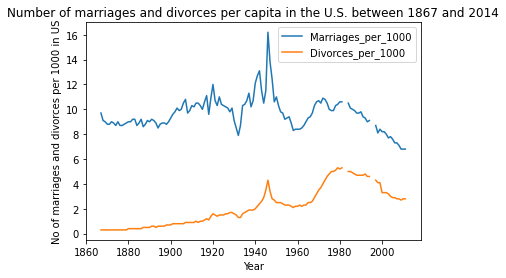

In [495]:
# Step 3. Creating line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014

# setting up the two columns to plot
columns = ('Marriages_per_1000','Divorces_per_1000')

# creating x-axis data
x_axis_data = (US_data['Year'])

# creating figure and axis
fig, ax = plt.subplots()

# plotting each column against x-axis data declared above
for column in columns:
    ax.plot(x_axis_data, US_data[column])

# setting up title, x-axis, y-axis and legend
ax.set_title('Number of marriages and divorces per capita in the U.S. between 1867 and 2014')
ax.set_xlabel('Year')
ax.set_ylabel('No of marriages and divorces per 1000 in US')
ax.legend({'Marriages_per_1000', 'Divorces_per_1000'})


# Question 7

In [496]:
# Step1. US_data has already been imported as part of #Question6 above

US_data   # Displaying contents in US_data

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


In [497]:
# Step 2. Creating vertical bar chart comparing the number of marriages and divorces per capita in the U.S. 
# between 1900, 1950, and 2000.

# First, creating another dataframe 'US_data_sort' to extract the data from 'US_data' for years 1900, 1950 and 2000 respectively
US_data_sort = US_data

US_data_sort = US_data_sort[US_data_sort['Year'].apply(lambda x: x in [1900, 1950, 2000])]

US_data_sort          # displaying contents in 'US_data_sort'

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
33,1900,709000.0,56000.0,76094000,9.3,0.7
83,1950,1667000.0,385000.0,151684000,11.0,2.5
133,2000,2315000.0,944000.0,282398000,8.2,3.3


Text(0, 0.5, 'No of marriages and divorces per 1000 in US')

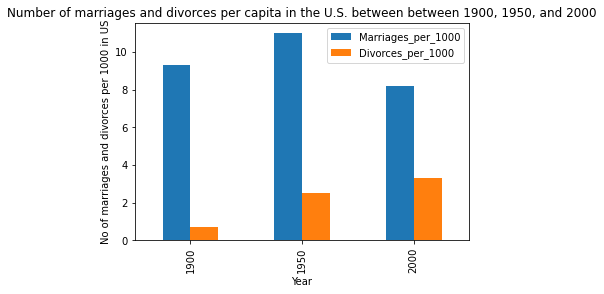

In [498]:
# Now, plotting the bar chart using the data from above dataframe 'US_data_sort'
# x-axis as 'Year' and on y-axis data of 'Marriages_per_1000', 'Divorces_per_1000'

# below expression used for plotting bar chart to get the number of marriages and divorces per capita in the U.S. 
# between 1900, 1950, and 2000
US_data_sort.plot.bar(x='Year', y=['Marriages_per_1000', 'Divorces_per_1000'])

# setting up title, x-axis, y-axis and legend
plt.title('Number of marriages and divorces per capita in the U.S. between between 1900, 1950, and 2000')
plt.xlabel('Year')
plt.ylabel('No of marriages and divorces per 1000 in US')

# Question 8

In [505]:
# Create a horizontal bar chart that compares the deadliest actors in Hollywood. 
# Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

# Step 1. Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [506]:
# Step 2. Import the dataset from the attached file: actor_kill_counts.csv
actor_data = pd.read_csv("C:/Users/abhis/Downloads/Backup-20211009T021753Z/Backup/Georgian/Classes/BDAT 1004_Data Programming/Problem Set3/actor_kill_counts.csv")

actor_data     # displaying contents in actor_data

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


In [515]:
# Step3: Sorting the data in 'actor_data' by their kill count and storing in 'actor_data_sort'
actor_data_sort = actor_data.sort_values(['Count'], ascending=[True])
actor_data_sort       # displaying sorted data

,Actor,Count
9,Wesley Snipes,193
3,Clive Owen,194
5,Jet Li,201
6,Nicolas Cage,204
2,Clint Eastwood,207
8,Tomisaburo Wakayama,226
4,Dolph Lundgren,239
7,Sylvester Stallone,267
1,Chow Yun-Fat,295
0,Arnold Schwarzenegger,369


Text(0, 0.5, 'Actor name')

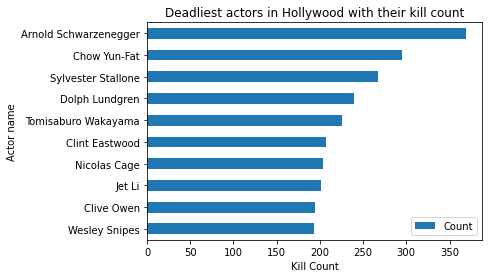

In [516]:
# Step4: Now, plotting the horizontal bar chart using the data from above dataframe 'actor_data_sort'

# below expression used for plotting horizontal bar chart to display deadliest actors in Hollywood by their kill count 
actor_data_sort.plot.barh(x='Actor', y='Count')

# setting up title, x-axis, y-axis and legend
plt.title('Deadliest actors in Hollywood with their kill count')
plt.xlabel('Kill Count')
plt.ylabel('Actor name')

# Question 9

In [2]:
# Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
# Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

# Step 1. Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Step 2. Import the dataset from the attached file: roman-emperor-reigns.csv
Emperors_data = pd.read_csv("C:/Users/abhis/Downloads/Backup-20211009T021753Z/Backup/Georgian/Classes/BDAT 1004_Data Programming/Problem Set3/roman-emperor-reigns.csv")

Emperors_data    # displaying contents in Emperors_data

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


In [4]:
# Step3: Creating a pie chart to show Assassinated Roman Emperors with their percentage length of Reign

# First installed plotly and imported necessary plotly libraries so as to proceed with Pie-chart using plotly

import sys
sys.prefix

'C:\\Users\\abhis\\anaconda3'

In [5]:
! {sys.prefix}/Scripts/pip install plotly

In [6]:
# Importing the plotly necessary libraries

import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [7]:
# First, creating another dataframe 'Emperors_data_sort' to extract the data from 'Emperors_data' 
# for Cause_of_Death as 'Assassinated'

Emperors_data_sort = Emperors_data

Emperors_data_sort = Emperors_data_sort[Emperors_data_sort['Cause_of_Death'].apply(lambda x: x == 'Assassinated')]

Emperors_data_sort     # displaying contents in Emperors_data_sort

,Emperor,Length_of_Reign,Cause_of_Death
2,Caligula,4.83,Assassinated
5,Galba,0.58,Assassinated
7,Vitellius,0.67,Assassinated
10,Domitian,15.00,Assassinated
17,Commodus,15.00,Assassinated
18,Pertinax,0.25,Assassinated
21,Caracalla,19.00,Assassinated
22,Geta,3.00,Assassinated
24,Elagabalus,3.75,Assassinated
25,Severus Alexander,13.00,Assassinated


In [8]:
# Generating pie chart using plotly to show Assassinated Roman Emperors with their percentage length of Reign

# Defining pie_chart and pie_chart_list to be used in generating pie chart
pie_chart = Emperors_data_sort.Length_of_Reign
pie_chart_list = Emperors_data_sort['Length_of_Reign']

# defining labels
labels = Emperors_data_sort.Emperor

# defining figure with below standard information
fig = {
  "data": [
    {
      "values": pie_chart_list,
      "labels": labels,
      "domain": {"x": [.5, .5]},
      "name": "Percentage length reign of Assassinated Emperors",
      "hoverinfo":"label+percent+name",
      "hole": .2,
      "type": "pie"
    },],

    # defining layout information
  "layout": {
        "title":"Assassinated Roman Emperors with their percentage length of Reign",
        "annotations": [
            { "font": { "size": 16},
              "showarrow": False,
              "text": "Percentage reign of Assassinated Emperors",
                "x": 0.2,
                "y": 1
            
             
            },
        ]
    }
}

iplot(fig)                # plotting the figure and displayed as below

# Note: Howering on each block displays respective Emperor's name, text information with their percentage length of reign.

# NOTE: Although, the pie-chart generated using above code is visible in ipynb file in Jupyter Notebook but it's not showing in GitHub.
# The pie-chart generated can be seen using nbviewer. Please find the link to view this entire Problem Set3 solution as below wherein pie-chart can be seen after scrolling all the way down to Question9:
# https://nbviewer.org/github/Abhinav-Sharma-BDAT/Abhinav.Sharma.BDAT1004PS3/blob/main/Abhinav.Sharma.BDAT1004PS3%20-%20200476122.ipynb

Moreover, I have also attached the .ipynb file alongwith my submission.

# Question 10

In [662]:
# Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science 
# PhDs awarded in the U.S. between 2000 and 2009.
# Don't forget to label your axes! Color each dot according to its year.

# Step 1. Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [663]:
# Step 2. Import the dataset from the attached file: arcade-revenue-vs-cs-doctorates.csv
Revenue_Phd_data = pd.read_csv("C:/Users/abhis/Downloads/Backup-20211009T021753Z/Backup/Georgian/Classes/BDAT 1004_Data Programming/Problem Set3/arcade-revenue-vs-cs-doctorates.csv")

Revenue_Phd_data    # displaying contents in Emperors_data

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


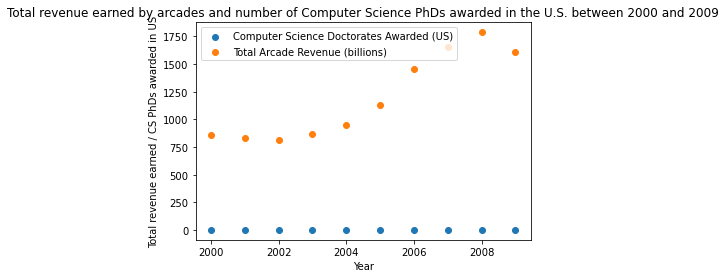

In [664]:
# Step3: Creating a scatter plot to show relationship between the total revenue earned by arcades and the number of Computer 
# Science PhDs awarded in the U.S. between 2000 and 2009

# setting up the two columns to plot
Revenue_columns = ('Total Arcade Revenue (billions)','Computer Science Doctorates Awarded (US)')

# Defining x-axis data
x_axis = (Revenue_Phd_data['Year'])

# creating figure and axis
fig, ax = plt.subplots()

# plotting scatter plot each column against x-axis data declared above
for column in Revenue_columns:
    ax.scatter(x_axis, Revenue_Phd_data[column])

# setting up title, x-axis, y-axis and legend
ax.set_title('Total revenue earned by arcades and number of Computer Science PhDs awarded in the U.S. between 2000 and 2009')
ax.set_xlabel('Year')
ax.set_ylabel('Total revenue earned / CS PhDs awarded in US')
ax.legend({'Total Arcade Revenue (billions)', 'Computer Science Doctorates Awarded (US)'})
